## 强制修改MNE.Raw中不让修改的变量,重新保存为新脑磁文件
以修改raw._cals为例：Raw 对象会重新设置校准因子（_cals），因此强制修改 _cals 并保存为新的文件会导致 _cals 被覆盖， 不能保存修改过后的值。

In [66]:
## Modify the raw._cals (Calibration factors) and resave fif.
import mne
import numpy as np

raw = mne.io.read_raw_fif("/Users/reallo/Downloads/anonymize_raw_tsss.fif",verbose=False)
print("raw._cals shape",raw._cals.shape)
raw._cals

raw._cals shape (368,)


array([ 3.25000005e-09,  3.25000005e-09,  4.14000015e-11,  3.25000005e-09,
       -3.25000005e-09,  4.14000015e-11,  3.25000005e-09, -3.25000005e-09,
        4.14000015e-11,  3.25000005e-09,  3.25000005e-09,  4.14000015e-11,
        3.25000005e-09,  3.25000005e-09,  4.14000015e-11,  3.25000005e-09,
       -3.25000005e-09,  4.14000015e-11,  3.25000005e-09, -3.25000005e-09,
        4.14000015e-11,  3.25000005e-09,  3.25000005e-09,  4.14000015e-11,
        3.25000005e-09,  3.25000005e-09,  4.14000015e-11,  3.25000005e-09,
       -3.25000005e-09,  4.14000015e-11,  3.25000005e-09,  3.25000005e-09,
        4.14000015e-11,  3.25000005e-09,  3.25000005e-09,  4.14000015e-11,
        3.25000005e-09,  3.25000005e-09,  4.14000015e-11,  3.25000005e-09,
       -3.25000005e-09,  4.14000015e-11,  3.25000005e-09, -3.25000005e-09,
        4.14000015e-11,  3.25000005e-09,  3.25000005e-09,  4.14000015e-11,
        3.25000005e-09,  3.25000005e-09,  4.14000015e-11,  3.25000005e-09,
        3.25000005e-09,  

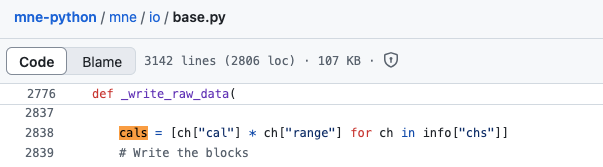
在_write_raw_data函数中，有重新计算cals的步骤。
所以想要修改cals，就需要修改 ch['cal'] 和 ch['range']

In [67]:
cals = [ch["cal"] * ch["range"] for ch in raw.info["chs"]]
cals

[3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 -3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 -3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 -3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 -3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 -3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 3.250000046861601e-09,
 4.1400001482561066e-11,
 3.250000046861601e-09,
 -3.250000046861601e-0

In [ ]:
for idx,ch in enumerate(raw.info["chs"]):
    raw.info['chs'][idx]["cal"] = 1  # 注意不能是0，因为mne源码内有除cal的操作
    raw.info['chs'][idx]["range"] = 1 

# raw._cals = np.ones(*raw._cals.shape)
raw.save("new_raw.fif",verbose=False,overwrite=True)
raw_new = mne.io.read_raw("new_raw.fif",verbose=False)

In [74]:
raw_new._cals

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.